In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Load datasets
customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [4]:
# Step 2: Aggregate transaction data
transaction_summary = transactions.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    total_transactions=("TransactionID", "nunique"),
    total_quantity=("Quantity", "sum")
).reset_index()

In [5]:
# Step 3: Merge customer and transaction data
customer_data = pd.merge(customers, transaction_summary, on="CustomerID", how="left").fillna(0)

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

In [7]:
# Step 4: Preprocess data
# Select relevant features
features = customer_data[["total_spent", "total_transactions", "total_quantity"]]

In [8]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
# Step 5: Clustering with K-Means
# Test different numbers of clusters
db_scores = []
cluster_range = range(2, 11)

In [10]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    db_scores.append(db_index)

In [11]:
# Step 6: Select optimal clusters and fit final model
optimal_clusters = cluster_range[np.argmin(db_scores)]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(scaled_features)

In [12]:
# Step 7: Visualize the clusters
# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_data["PCA1"] = reduced_features[:, 0]
customer_data["PCA2"] = reduced_features[:, 1]

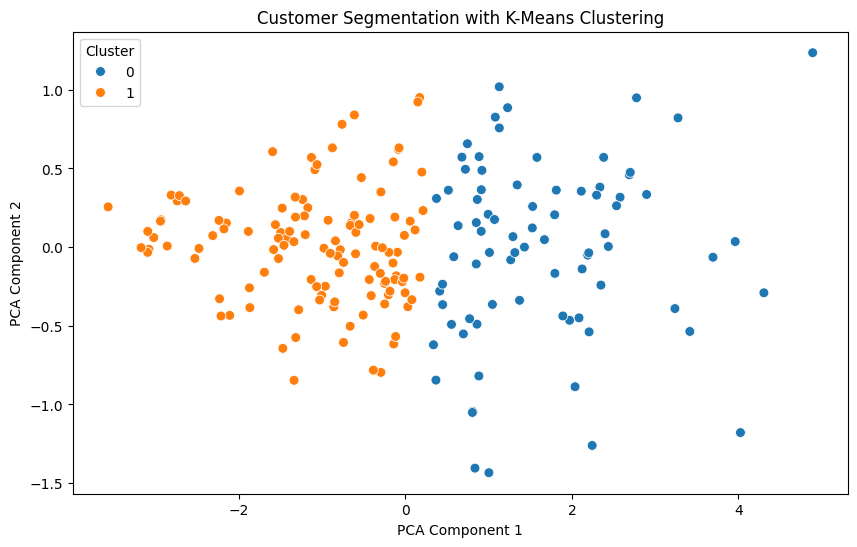

In [13]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Cluster", data=customer_data, palette="tab10", s=50
)
plt.title("Customer Segmentation with K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [14]:
print(f"Optimal Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index: {min(db_scores)}")

Optimal Clusters: 2
Davies-Bouldin Index: 0.7234787545050064
